# 4f Optical System Simulations

In [ ]:
!pip install torchoptics

In [2]:
import torch
import torchoptics
from torchoptics import Field, System
from torchoptics.elements import Lens
from torchoptics.profiles import checkerboard

In [3]:
# Set simulation properties
shape = 1000  # Number of grid points in each dimension
spacing = 10e-6  # Spacing between grid points (m)
wavelength = 700e-9  # Field wavelength (m)
focal_length = 200e-3  # Lens focal length (m)
tile_length = 400e-6  # Checkerboard tile length (m)
num_tiles = 15  # Number of tiles in each dimension

# Determine device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Configure torchoptics default properties
torchoptics.set_default_spacing(spacing)
torchoptics.set_default_wavelength(wavelength)

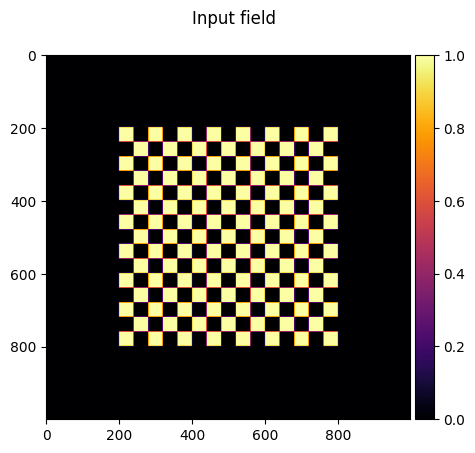

In [4]:
# Initialize input field with checkerboard pattern
field_data = checkerboard(shape, tile_length, num_tiles)
input_field = Field(field_data).to(device)

input_field.visualize(title="Input field", intensity=True)

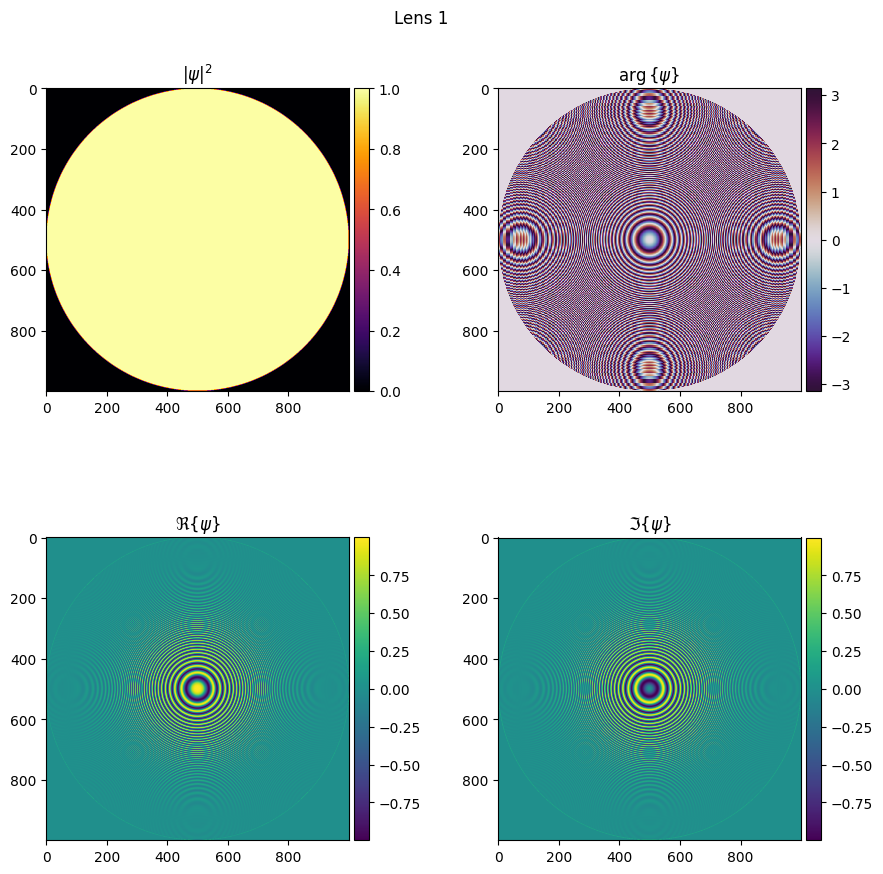

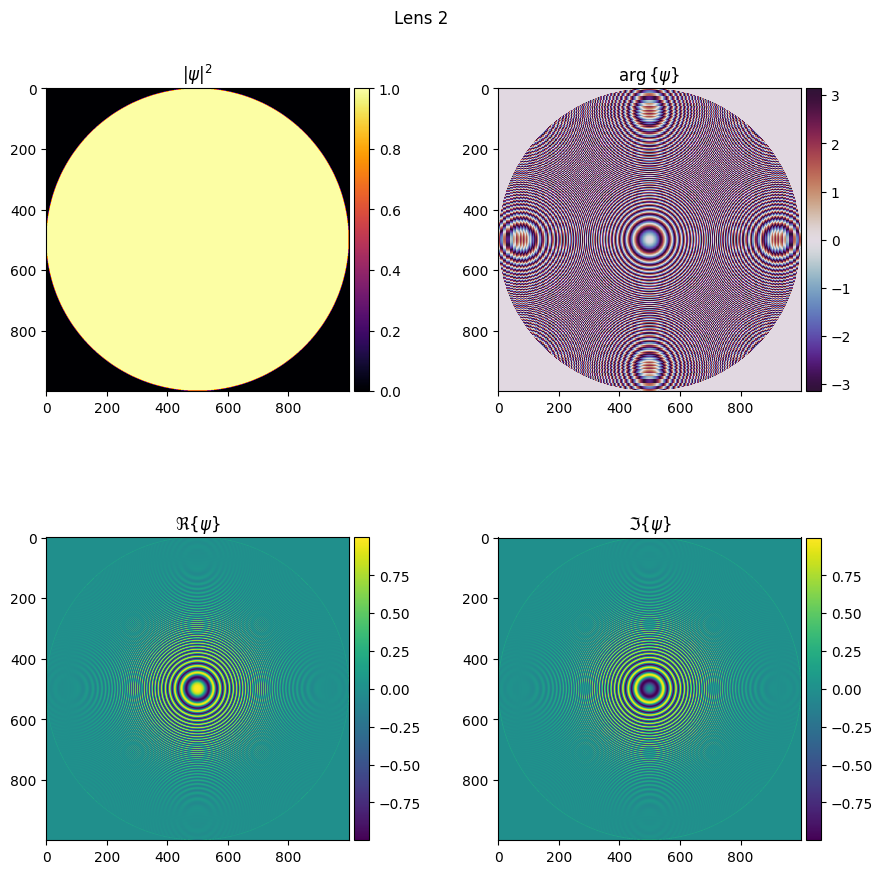

In [5]:
# Define 4f optical system with two lenses
system = System(
    Lens(shape, focal_length, z=1 * focal_length),
    Lens(shape, focal_length, z=3 * focal_length),
).to(device)

system[0].visualize(title="Lens 1")
system[1].visualize(title="Lens 2")

In [6]:
# Measure field at focal planes along the z-axis
measurements = [
    system.measure_at_z(input_field, z=i * focal_length)
    for i in range(5)
]

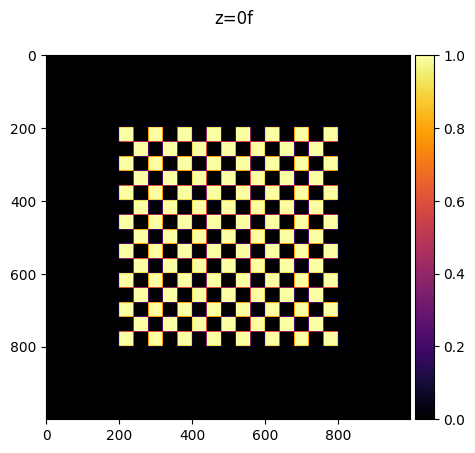

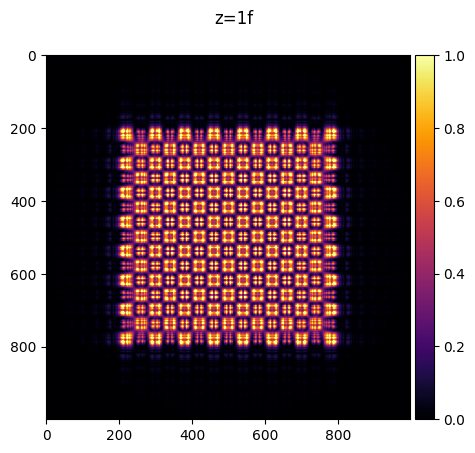

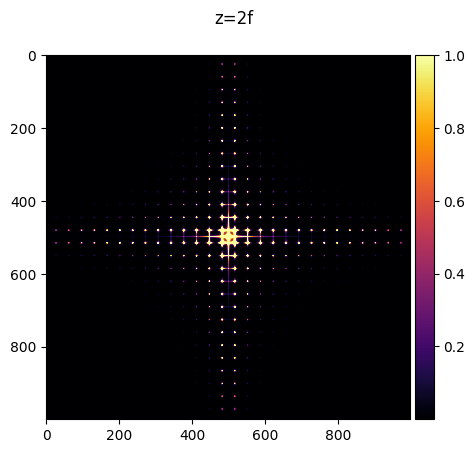

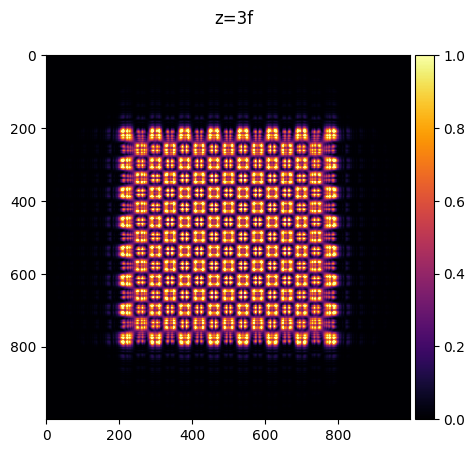

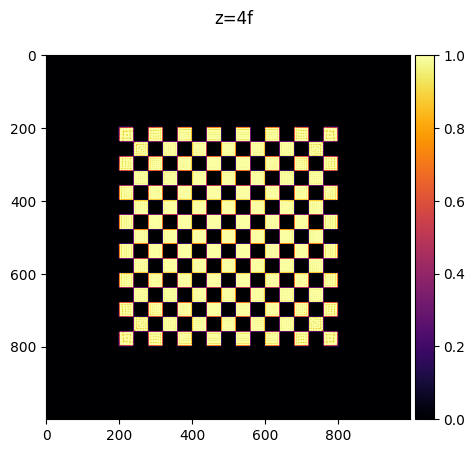

In [7]:
# Visualize the measured intensity distributions
for i, measurement in enumerate(measurements):
    measurement.visualize(title=f"z={i}f", vmax=1, intensity=True)

## Low-pass filter

In [8]:
from torchoptics.elements import Modulator
from torchoptics.profiles import circle

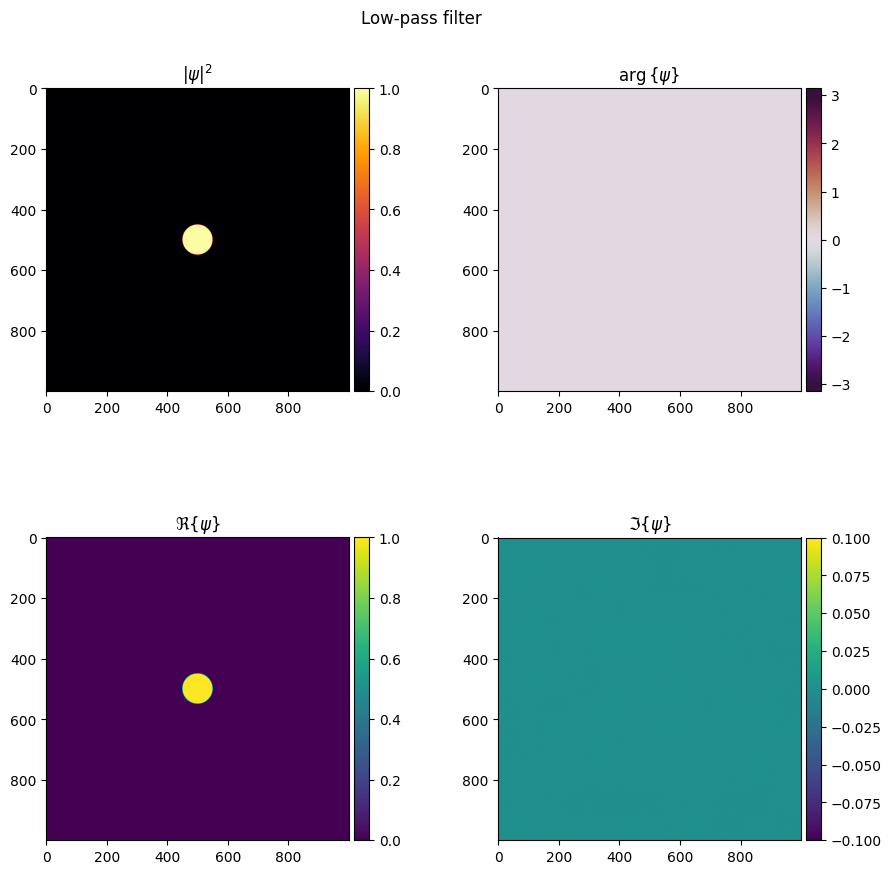

In [9]:
radius = 500e-6

low_pass_modulation_profile = circle(shape, radius)
low_pass_system = System(
    Lens(shape, focal_length, z=1 * focal_length),
    Modulator(low_pass_modulation_profile, z=2 * focal_length),
    Lens(shape, focal_length, z=3 * focal_length),
).to(device)

# Visualize the low-pass filter
low_pass_system[1].visualize(title="Low-pass filter")

In [10]:
# Measure field at different positions along the z-axis
measurements = [low_pass_system.measure_at_z(input_field, z=i * focal_length) for i in range(5)]

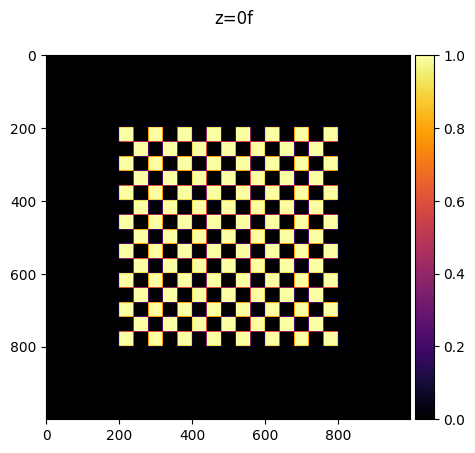

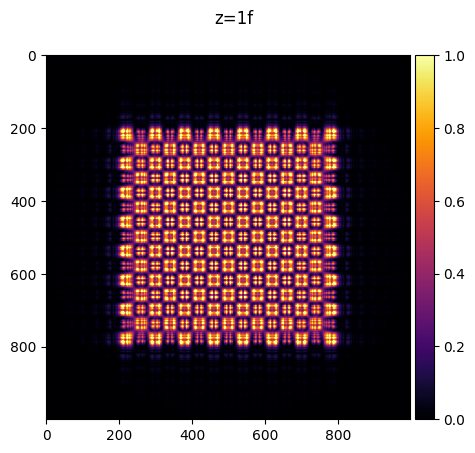

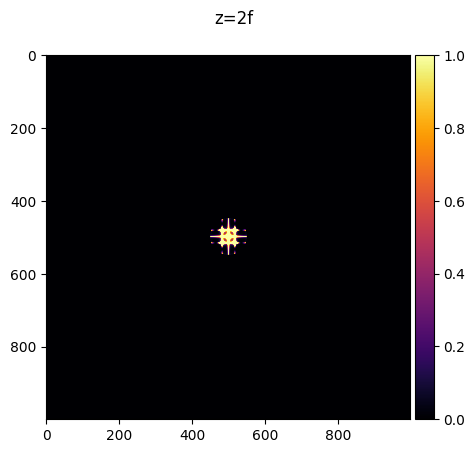

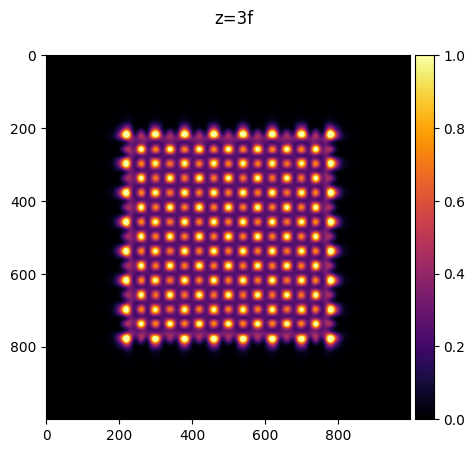

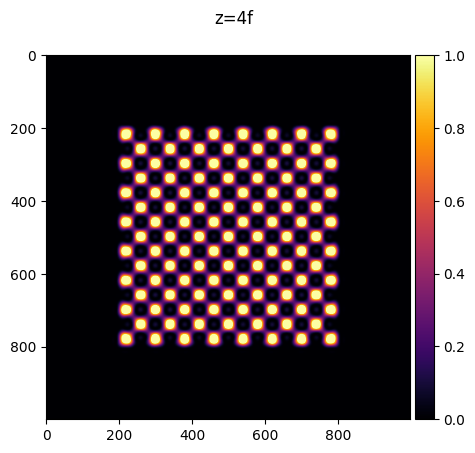

In [11]:
# Visualize the measured fields
for i, measurement in enumerate(measurements):
    measurement.visualize(title=f"z={i}f", vmax=1, intensity=True)

## High-pass filter


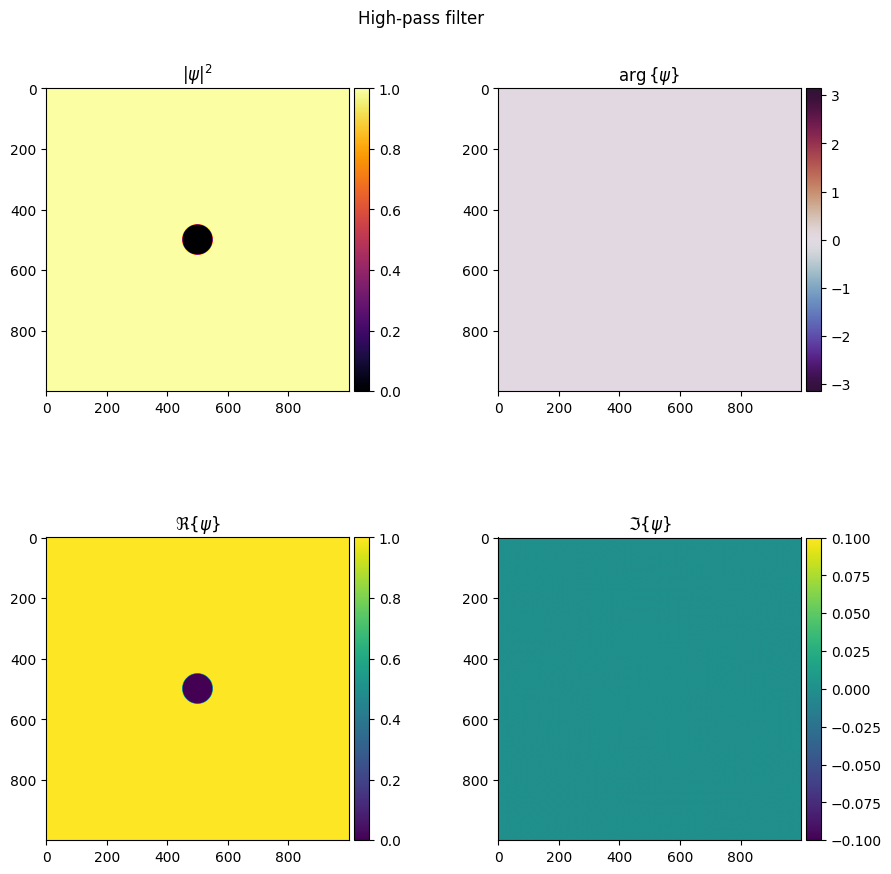

In [12]:
high_pass_modulation_profile = low_pass_modulation_profile.logical_not()
high_pass_system = System(
    Lens(shape=1000, focal_length=focal_length, z=1 * focal_length),
    Modulator(high_pass_modulation_profile, z=2 * focal_length),
    Lens(shape=1000, focal_length=focal_length, z=3 * focal_length),
).to(device)

# Visualize the high-pass filter
high_pass_system[1].visualize(title="High-pass filter")

In [13]:
# Measure field at different positions along the z-axis
measurements = [high_pass_system.measure_at_z(input_field, z=i * focal_length) for i in range(5)]

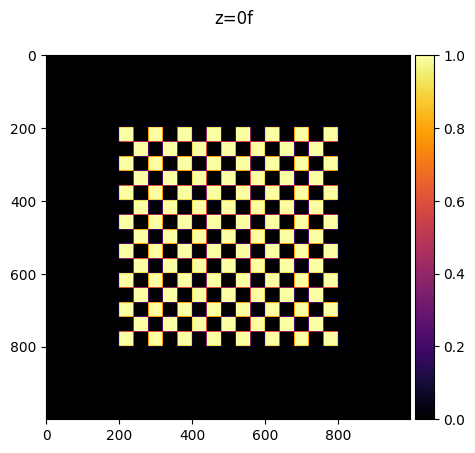

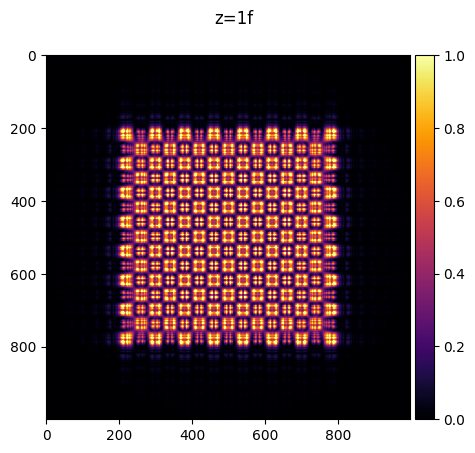

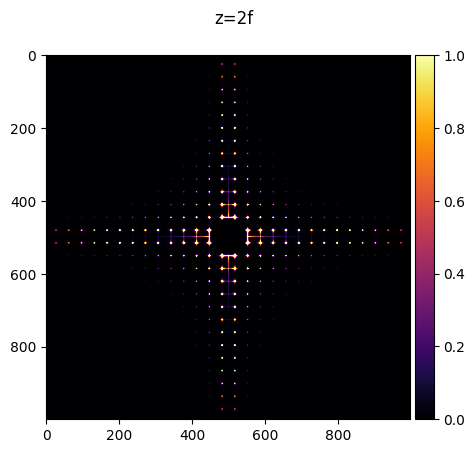

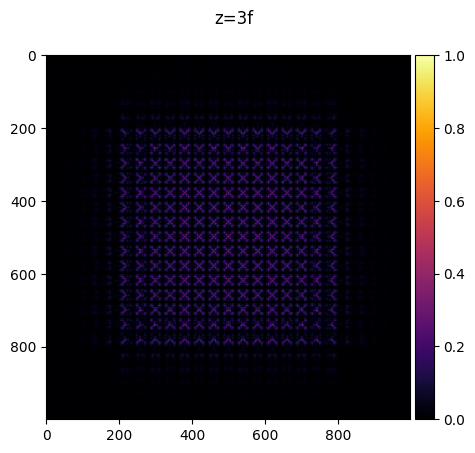

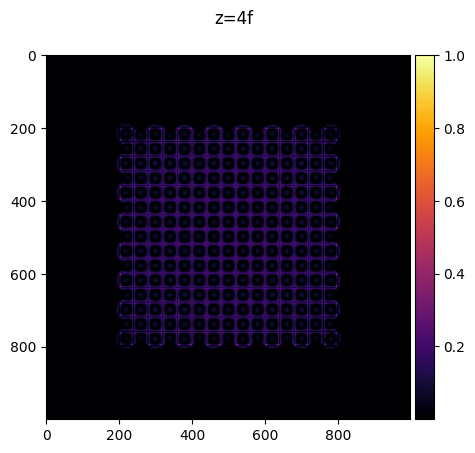

In [14]:
# Visualize the measured fields
for i, measurement in enumerate(measurements):
    measurement.visualize(title=f"z={i}f", vmax=1, intensity=True)